In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures


In [2]:
data = pd.read_csv("/Users/pamukcu/Desktop/datasets/train_hm.csv")
data_copy = data.copy()
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [4]:
pd.set_option("display.max_rows", 500)
print(data)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [5]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [6]:
def grab_col_names(dataframe, target, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri
        target: str
                Bağımlı(hedef) değişken

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols_mask = [col for col in dataframe.columns if dataframe[col].dtypes == "O"
                     and dataframe[col].nunique() < car_th and col != target]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtypes != "O"
                   and dataframe[col].nunique() < cat_th and col != target]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].dtypes == "O" and
                   col not in cat_cols_mask and col != target]

    cat_cols = cat_cols_mask + num_but_cat

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"
                and col not in num_but_cat and col != target]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car
cat_cols, num_cols, cat_but_car = grab_col_names(data,"SalePrice" )


Observations: 1460
Variables: 81
cat_cols: 53
num_cols: 26
num_but_cat: 11


In [7]:
# Kategorik sütunları One-Hot Encoding yapma
for column in data.columns:
    data_encoded = pd.get_dummies(cat_cols, columns=[column])
    print(data_encoded)
    

    Alley  BedroomAbvGr  BldgType  BsmtCond  BsmtExposure  BsmtFinType1  \
0   False         False     False     False         False         False   
1   False         False     False     False         False         False   
2    True         False     False     False         False         False   
3   False         False     False     False         False         False   
4   False         False     False     False         False         False   
5   False         False     False     False         False         False   
6   False         False     False     False         False         False   
7   False         False     False     False         False         False   
8   False         False     False     False         False         False   
9   False         False     False     False         False         False   
10  False         False      True     False         False         False   
11  False         False     False     False         False         False   
12  False         False  

In [8]:
for column in num_cols:
    print(data[column].head(2))

0    1
1    2
Name: Id, dtype: int64
0    60
1    20
Name: MSSubClass, dtype: int64
0    65.0
1    80.0
Name: LotFrontage, dtype: float64
0    8450
1    9600
Name: LotArea, dtype: int64
0    7
1    6
Name: OverallQual, dtype: int64
0    2003
1    1976
Name: YearBuilt, dtype: int64
0    2003
1    1976
Name: YearRemodAdd, dtype: int64
0    196.0
1      0.0
Name: MasVnrArea, dtype: float64
0    706
1    978
Name: BsmtFinSF1, dtype: int64
0    0
1    0
Name: BsmtFinSF2, dtype: int64
0    150
1    284
Name: BsmtUnfSF, dtype: int64
0     856
1    1262
Name: TotalBsmtSF, dtype: int64
0     856
1    1262
Name: 1stFlrSF, dtype: int64
0    854
1      0
Name: 2ndFlrSF, dtype: int64
0    0
1    0
Name: LowQualFinSF, dtype: int64
0    1710
1    1262
Name: GrLivArea, dtype: int64
0    8
1    6
Name: TotRmsAbvGrd, dtype: int64
0    2003.0
1    1976.0
Name: GarageYrBlt, dtype: float64
0    548
1    460
Name: GarageArea, dtype: int64
0      0
1    298
Name: WoodDeckSF, dtype: int64
0    61
1     0
Name

In [9]:
#Boş Sütunları Siliyoruz
data.drop('Alley', axis=1, inplace=True)

In [10]:
data.drop('MasVnrType', axis=1, inplace=True)

In [11]:
# Eksik değerleri burda dolduruyoruz
data['Electrical'].fillna("Standard Circuit Breakers & Romex", inplace=True)

In [12]:
data['MasVnrArea'].fillna("Masonry veneer area in square feet", inplace=True)

In [13]:
data['LotFrontage'].fillna("Linear feet of street connected to property", inplace=True)

In [14]:
data['BsmtQual'].fillna("No Basement", inplace=True)

In [15]:
data['BsmtCond'].fillna("No Basement", inplace=True)

In [16]:
data['BsmtExposure'].fillna("No Basement", inplace=True)

In [17]:
data['BsmtFinType1'].fillna("No Basement", inplace=True)

In [18]:
data['BsmtFinType2'].fillna("No Basement", inplace=True)

<Axes: >

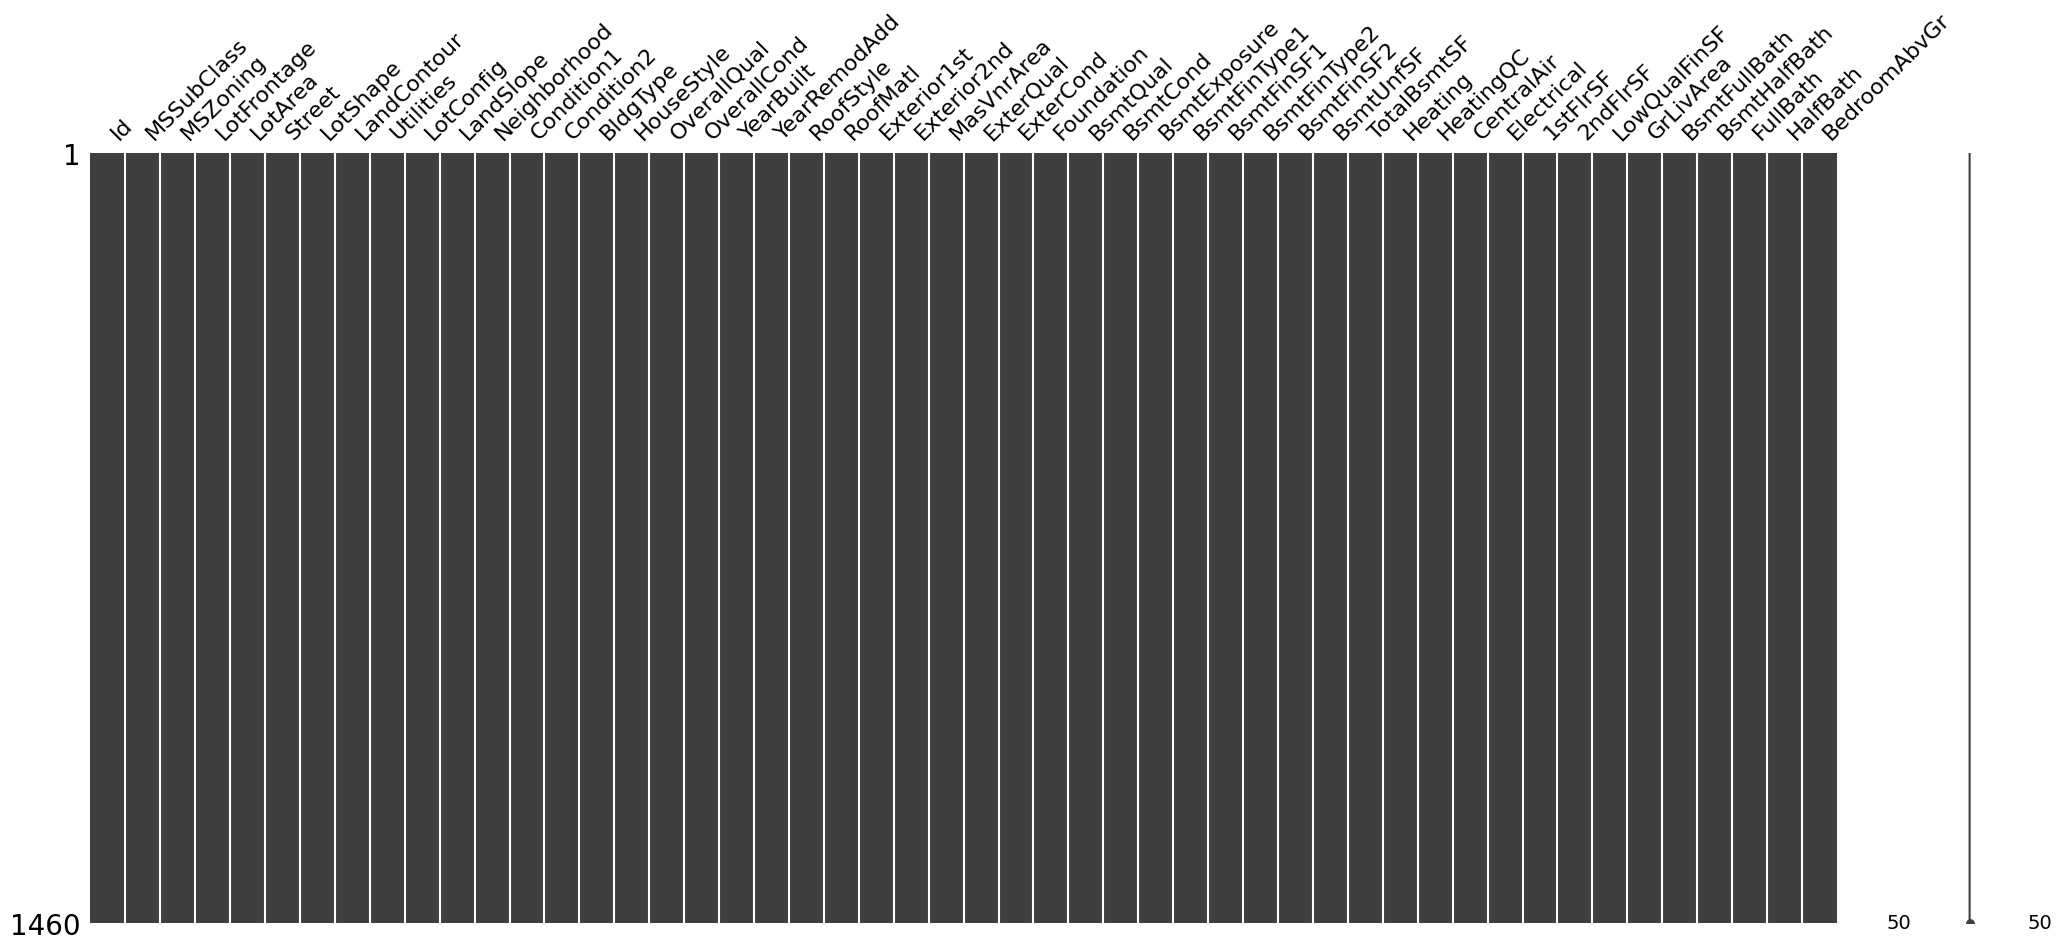

In [19]:
msno.matrix( data.iloc[:, :50])

In [20]:
#Boş Sütunları Siliyoruz
data.drop('PoolQC', axis=1, inplace=True)


In [21]:
data.drop('MiscFeature', axis=1, inplace=True)

In [22]:
data['Fence'].fillna("No Fence", inplace=True)


In [23]:
data['GarageType'].fillna("No Garage", inplace=True)

In [24]:
data['GarageYrBlt'].fillna("Year garage was built", inplace=True)

In [25]:
data['GarageFinish'].fillna("No Garage", inplace=True)

In [26]:
data['GarageQual'].fillna("No Garage", inplace=True)

In [27]:
data['GarageCond'].fillna("No Garage", inplace=True)

In [28]:
data['FireplaceQu'].fillna("Fireplace quality", inplace=True)

<Axes: >

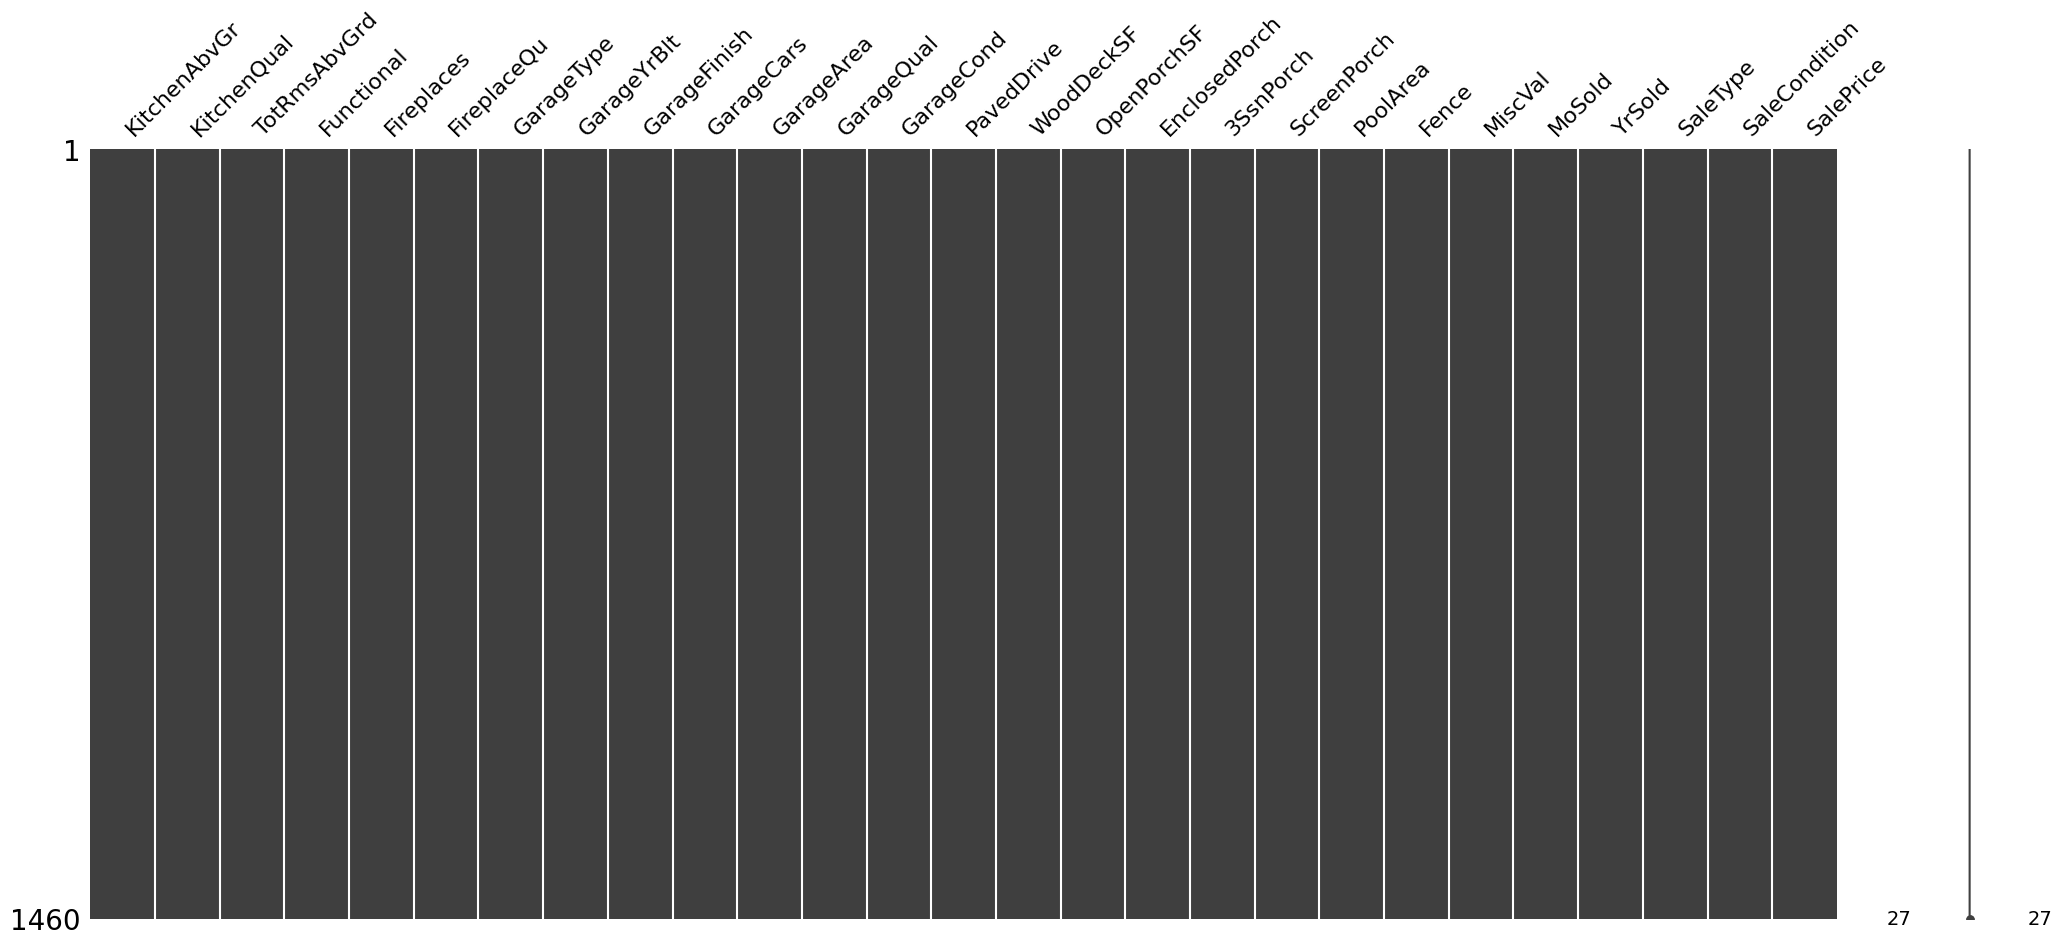

In [29]:
msno.matrix( data.iloc[:, 50:])

In [30]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit
def check_outlier(dataframe, col_name, print_values=False):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) |
                 (dataframe[col_name] < low_limit)].any(axis=None):
        if print_values:
            print(f'Values with higher values than upper limit in {col_name}:\n'
                  f'{dataframe.loc[dataframe[col_name] > up_limit, col_name]}\n')
            print(f'Values with lower values than lower limit in {col_name}:\n'
                  f'{dataframe.loc[dataframe[col_name] < low_limit, col_name]}\n',)
        else:
            print(f'There is outlined data in {col_name}')
            print(f'num of outlied data: {dataframe.loc[dataframe[col_name] < low_limit, col_name].count() + dataframe.loc[dataframe[col_name] > up_limit, col_name].count()}\n')
        return True
    else:
        print(f'There is no outlined data in {col_name}\n')
        return False
    
    

In [31]:
cat_cols, num_cols, cat_but_car = grab_col_names(data,"SalePrice" )

Observations: 1460
Variables: 77
cat_cols: 49
num_cols: 23
num_but_cat: 11


In [32]:
# İstenen sütunları liste içinde verelim
columns_to_check = ['LotArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
                    'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageArea',
                    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                    'ScreenPorch', 'MiscVal']

# For döngüsü ile her sütun için işlem yapalım
for col_name in columns_to_check:
    # Önce aykırı değerlerin up limit ve low limitini hesaplayalım
    low_limit, up_limit = outlier_thresholds(data, col_name)

    # Aykırı değerleri up limit ile eşitleyelim
    data.loc[data[col_name] > up_limit, col_name] = up_limit

    # Aykırı değerleri low limit ile eşitleyelim
    data.loc[data[col_name] < low_limit, col_name] = low_limit

    # Aykırı değerleri kontrol edelim
    check_outlier(data, col_name, print_values=True)


There is no outlined data in LotArea

There is no outlined data in BsmtFinSF2

There is no outlined data in BsmtUnfSF

There is no outlined data in TotalBsmtSF

There is no outlined data in 1stFlrSF

There is no outlined data in LowQualFinSF

There is no outlined data in GrLivArea

There is no outlined data in TotRmsAbvGrd

There is no outlined data in GarageArea

There is no outlined data in WoodDeckSF

There is no outlined data in OpenPorchSF

There is no outlined data in EnclosedPorch

There is no outlined data in 3SsnPorch

There is no outlined data in ScreenPorch

There is no outlined data in MiscVal



In [33]:
# Önce aykırı değerlerin up limitini hesaplayalım
low_limit, up_limit = outlier_thresholds(data, 'MSSubClass')

# Aykırı değerleri up limit ile eşitleyelim
data.loc[data['MSSubClass'] > up_limit, 'MSSubClass'] = up_limit

# Aykırı değerleri low limit ile eşitleyelim
data.loc[data['MSSubClass'] < low_limit, 'MSSubClass'] = low_limit

# Aykırı değerleri kontrol edelim
check_outlier(data, 'MSSubClass', print_values=True)


There is no outlined data in MSSubClass



False

In [34]:
# İstenen sütunları liste içinde verelim
columns_to_remove = ['OverallQual','YearBuilt','BsmtFinSF1','2ndFlrSF']

# For döngüsü ile her sütun için düşme işlemi yapalım
for col_name in columns_to_remove:
    # Sütunu veri setinden düşürelim
    data.drop(col_name, axis=1, inplace=True)

In [35]:
cat_cols, num_cols, cat_but_car = grab_col_names(data,"SalePrice" )

Observations: 1460
Variables: 73
cat_cols: 56
num_cols: 12
num_but_cat: 18


In [36]:

for column in num_cols:
    check_outlier(data, column, print_values=False)
    # Çeyrek değerlere bölüp düşürme yaparız belki

There is no outlined data in Id

There is no outlined data in MSSubClass

There is no outlined data in LotArea

There is no outlined data in YearRemodAdd

There is no outlined data in BsmtUnfSF

There is no outlined data in TotalBsmtSF

There is no outlined data in 1stFlrSF

There is no outlined data in GrLivArea

There is no outlined data in GarageArea

There is no outlined data in WoodDeckSF

There is no outlined data in OpenPorchSF

There is no outlined data in MoSold



In [37]:
data[cat_cols].head(5)

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Condition1 Condition2 BldgType  ... KitchenAbvGr TotRmsAbvGrd Fireplaces  \
0       Norm       Norm     1Fam  ...            1            8          0   
1      Feedr       Norm     1Fam  ...            1            6          1   
2       Norm       Norm     1Fam  ...            1            6          1   
3       Norm       Norm     1Fam  ...            1            7          1   
4       Norm       Norm     1Fam  ...            1            9          1   

  GarageCars EnclosedPorch 3SsnPorch ScreenPorch PoolArea MiscVal YrSold  
0          2             0         0           0        0       0   2008  
1          2             0         0           0        0       0   2007  
2          2             0         0           0        0       0   2008  
3          3             0         0           0        0       0   2006  
4          3             0         0           0        0       0   2008  

[5 rows x 56 columns]

In [38]:
data[cat_cols].nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          5
BsmtCond          5
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        6
KitchenQual       4
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
Fence             5
SaleType          9
SaleCondition     6
OverallCond       9
BsmtFinSF2        1
LowQualFinSF      1
BsmtFullBath      4
BsmtHalfBath      3
FullBath          4
HalfBath          3
BedroomAbvGr      8
KitchenAbvGr      4
TotRmsAbvGrd      9
Fireplaces        4
GarageCars        5


In [39]:

columns_to_drop = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
data.drop(columns_to_drop, axis=1, inplace=True)



In [40]:
categorical_columns = data.select_dtypes(include='object').columns.tolist()

#Define the categorical columns to exclude from normalization
categorical = categorical_columns

#Define the columns to include in normalization
columns_to_normalize = [col for col in data.columns if col not in categorical]

#Get the data to be scaled
data_continuous = data[columns_to_normalize]

#List to store column names
min_max_column_names = list(data_continuous.columns)
#Dictionary to store scaled columns
all_scalers = {}

for column_name in min_max_column_names:
    all_scalers[column_name] = MinMaxScaler().fit(data_continuous[[column_name]])

#Transform the continuous columns
for column_name, scaler in all_scalers.items():
    data_continuous[column_name] = scaler.transform(data_continuous[[column_name]].values.reshape(-1, 1))

#Concatenate the categorical, normalized, and last 6 columns
normalize_data = pd.concat([data[categorical], data_continuous], axis=1)

#Ensure that the columns are unique and in the same order as the original data
normalize_data = data.loc[:, ~data.columns.duplicated()]
normalize_data = data.reindex(data.columns, axis=1)

data = normalize_data

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/var/folders/vv/2hwy768926gc52_hc4k94jrc0000gn/T/ipykernel_3864/4016912217.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_continuous[column_name] = scaler.transform(data_continuous[[column_name]].values.reshape(-1, 1))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/var/folders/vv/2hwy768926gc52_hc4k94jrc0000gn/T/ipykernel_3864/4016912217.py:22: SettingWithCop

In [41]:
categorical_columns = data.select_dtypes(include='object').columns.tolist()

#Define the categorical columns to exclude from normalization
categorical = categorical_columns
total_unique_count = 0
for column in categorical:
    unique_values = data[column].unique()
    unique_count = data[column].nunique()
    total_unique_count += unique_count

    print(f"{column} sütununun unique değerleri:")
    print(unique_values)
    print(f"Toplam unique değer sayısı: {unique_count}")


MSZoning sütununun unique değerleri:
['RL' 'RM' 'C (all)' 'FV' 'RH']
Toplam unique değer sayısı: 5
Street sütununun unique değerleri:
['Pave' 'Grvl']
Toplam unique değer sayısı: 2
LotShape sütununun unique değerleri:
['Reg' 'IR1' 'IR2' 'IR3']
Toplam unique değer sayısı: 4
LandContour sütununun unique değerleri:
['Lvl' 'Bnk' 'Low' 'HLS']
Toplam unique değer sayısı: 4
Utilities sütununun unique değerleri:
['AllPub' 'NoSeWa']
Toplam unique değer sayısı: 2
LotConfig sütununun unique değerleri:
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Toplam unique değer sayısı: 5
LandSlope sütununun unique değerleri:
['Gtl' 'Mod' 'Sev']
Toplam unique değer sayısı: 3
Neighborhood sütununun unique değerleri:
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Toplam unique değer sayısı: 25
Condition1 sütununun unique

In [42]:
cols_to_encode = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl', 'Exterior1st','Exterior2nd','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','Fence','SaleType','SaleCondition' ] # Burda Object olan değerleri one hot yapıyoruz.
def one_hot_encode(data, columns):
    for column in columns:
        data[column] = data[column].astype(str)  # Convert list elements to strings
    encoded_cols = pd.get_dummies(data[columns], dtype=np.float32)
    data_encoded = pd.concat([data, encoded_cols], axis=1)
    data_encoded.drop(columns, axis=1, inplace=True)
    return data_encoded
#print(data_encoded)

data = one_hot_encode(data, cols_to_encode) #TODO: ileride bunu açar eklersin bir problem olmaması için de kontrollerini sağlarsın
#ÖNEMLİ TODO: categorical columnların normalizasyon işlemini son kısımda yapmayı unutma

print("one hot encoding yapıldı")
print(f'cols_to_encode columnları: {cols_to_encode}')
#print(f'one hot encode yapılmış data: {data}')
print(data.columns.tolist())

one hot encoding yapıldı
cols_to_encode columnları: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']
['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearRemodAdd', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePr

In [43]:
data

Id  MSSubClass  LotArea  OverallCond  YearRemodAdd  BsmtFinSF2  \
0        1          60   8450.0            5          2003           0   
1        2          20   9600.0            8          1976           0   
2        3          60  11250.0            5          2002           0   
3        4          70   9550.0            5          1970           0   
4        5          60  14260.0            5          2000           0   
...    ...         ...      ...          ...           ...         ...   
1455  1456          60   7917.0            5          2000           0   
1456  1457          20  13175.0            6          1988           0   
1457  1458          70   9042.0            9          2006           0   
1458  1459          20   9717.0            6          1996           0   
1459  1460          20   9937.0            6          1965           0   

      BsmtUnfSF  TotalBsmtSF  1stFlrSF  LowQualFinSF  ...  SaleType_ConLw  \
0         150.0          856     856.0             0  ...             0.0   
1         284.0         1262    1262.0             0  ...             0.0   
2         434.0          920     920.0             0  ...             0.0   
3         540.0          756     961.0             0  ...             0.0   
4         490.0         1145    1145.0             0  ...             0.0   
...         ...          ...       ...           ...  ...             ...   
1455      953.0          953     953.0             0  ...             0.0   
1456      589.0         1542    2073.0             0  ...             0.0   
1457      877.0         1152    1188.0             0  ...             0.0   
1458        0.0         1078    1078.0             0  ...             0.0   
1459      136.0         1256    1256.0             0  ...             0.0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0              0.0           0.0          1.0                    0.0   
1              0.0           0.0          1.0                    0.0   
2              0.0           0.0          1.0                    0.0   
3              0.0           0.0          1.0                    1.0   
4              0.0           0.0          1.0                    0.0   
...            ...           ...          ...                    ...   
1455           0.0           0.0          1.0                    0.0   
1456           0.0           0.0          1.0                    0.0   
1457           0.0           0.0          1.0                    0.0   
1458           0.0           0.0          1.0                    0.0   
1459           0.0           0.0          1.0                    0.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                       0.0                   0.0                   0.0   
1                       0.0                   0.0                   0.0   
2                       0.0                   0.0                   0.0   
3                       0.0                   0.0                   0.0   
4                       0.0                   0.0                   0.0   
...                     ...                   ...                   ...   
1455                    0.0                   0.0                   0.0   
1456                    0.0                   0.0                   0.0   
1457                    0.0                   0.0                   0.0   
1458                    0.0                   0.0                   0.0   
1459                    0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
0                      1.0                    0.0  
1                      1.0                    0.0  
2                      1.0                    0.0  
3                      0.0                    0.0  
4                      1.0                    0.0  
...                    ...                    ...  
1455                   1.0                    0.0  
1456        

In [44]:
categorical_df = data.select_dtypes(include=['object'])
print(categorical_df.columns.tolist())

[]


In [45]:
data.WoodDeckSF.value_counts() # Columnların Değerlerini görebiliyoruz.

WoodDeckSF
0      761
192     38
100     36
144     33
420     32
120     31
168     28
140     15
224     14
208     10
240     10
216      9
180      8
160      8
250      6
143      6
132      6
264      6
96       6
156      6
196      5
210      5
171      5
105      5
48       5
288      5
158      4
220      4
182      4
125      4
147      4
74       4
64       4
104      4
36       4
201      3
149      3
172      3
280      3
108      3
268      3
239      3
88       3
40       3
270      3
72       3
335      3
164      3
198      3
150      3
165      3
178      3
142      3
203      3
80       3
112      3
113      3
188      3
146      2
252      2
136      2
186      2
342      2
26       2
296      2
184      2
214      2
272      2
55       2
364      2
222      2
28       2
135      2
155      2
122      2
127      2
324      2
206      2
169      2
382      2
253      2
148      2
349      2
12       2
49       2
320      2
194      2
185      2
115      2
154      2

In [46]:
data

Id  MSSubClass  LotArea  OverallCond  YearRemodAdd  BsmtFinSF2  \
0        1          60   8450.0            5          2003           0   
1        2          20   9600.0            8          1976           0   
2        3          60  11250.0            5          2002           0   
3        4          70   9550.0            5          1970           0   
4        5          60  14260.0            5          2000           0   
...    ...         ...      ...          ...           ...         ...   
1455  1456          60   7917.0            5          2000           0   
1456  1457          20  13175.0            6          1988           0   
1457  1458          70   9042.0            9          2006           0   
1458  1459          20   9717.0            6          1996           0   
1459  1460          20   9937.0            6          1965           0   

      BsmtUnfSF  TotalBsmtSF  1stFlrSF  LowQualFinSF  ...  SaleType_ConLw  \
0         150.0          856     856.0             0  ...             0.0   
1         284.0         1262    1262.0             0  ...             0.0   
2         434.0          920     920.0             0  ...             0.0   
3         540.0          756     961.0             0  ...             0.0   
4         490.0         1145    1145.0             0  ...             0.0   
...         ...          ...       ...           ...  ...             ...   
1455      953.0          953     953.0             0  ...             0.0   
1456      589.0         1542    2073.0             0  ...             0.0   
1457      877.0         1152    1188.0             0  ...             0.0   
1458        0.0         1078    1078.0             0  ...             0.0   
1459      136.0         1256    1256.0             0  ...             0.0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0              0.0           0.0          1.0                    0.0   
1              0.0           0.0          1.0                    0.0   
2              0.0           0.0          1.0                    0.0   
3              0.0           0.0          1.0                    1.0   
4              0.0           0.0          1.0                    0.0   
...            ...           ...          ...                    ...   
1455           0.0           0.0          1.0                    0.0   
1456           0.0           0.0          1.0                    0.0   
1457           0.0           0.0          1.0                    0.0   
1458           0.0           0.0          1.0                    0.0   
1459           0.0           0.0          1.0                    0.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                       0.0                   0.0                   0.0   
1                       0.0                   0.0                   0.0   
2                       0.0                   0.0                   0.0   
3                       0.0                   0.0                   0.0   
4                       0.0                   0.0                   0.0   
...                     ...                   ...                   ...   
1455                    0.0                   0.0                   0.0   
1456                    0.0                   0.0                   0.0   
1457                    0.0                   0.0                   0.0   
1458                    0.0                   0.0                   0.0   
1459                    0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
0                      1.0                    0.0  
1                      1.0                    0.0  
2                      1.0                    0.0  
3                      0.0                    0.0  
4                      1.0                    0.0  
...                    ...                    ...  
1455                   1.0                    0.0  
1456        

In [47]:
pd.set_option("display.max_columns",1000)

In [48]:
data.drop("Id", axis=1, inplace=True)


In [49]:
data = data.astype('float32')
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 281 entries, MSSubClass to SaleCondition_Partial
dtypes: float32(281)
memory usage: 1.6 MB


In [50]:

# Veriyi belli sayıda parçaya bölelim
num_splits = 10
split_size = len(data) // num_splits
data_splits = [data.iloc[i:i+split_size, :] for i in range(0, len(data), split_size)]



# Korelasyon matrislerini saklamak için bir liste oluşturalım
correlation_matrices = []

# Her bir veri parçası için korelasyon matrisini hesaplayalım ve listeye ekleyelim
for data_split in data_splits:
    correlation_matrix = data_split.corr()
    correlation_matrices.append(correlation_matrix)

# Korelasyon matrislerini birleştirerek genel korelasyon matrisini oluşturalım
merged_correlation_matrix = pd.concat(correlation_matrices)



# Korelasyon matrisindeki feature'lar arasındaki korelasyonun treshold değeri
treshold = 0.05

# Korelasyon matrisini düzleştirerek sadece üst üçgensel kısmını alın
upper_triangular = merged_correlation_matrix.where(
    np.triu(np.ones(merged_correlation_matrix.shape), k=1).astype(bool)
)

# Korelasyon matrisindeki her bir feature'ın diğer feature'larla olan korelasyonunu kontrol edin
# ve treshold değerini aşan feature'ları listeye ekleyin
highly_correlated_features = []
for col in upper_triangular.columns:
    correlated_cols = upper_triangular.index[upper_triangular[col].abs() > treshold].tolist()
    if correlated_cols:
        highly_correlated_features.extend([(col, correlated_col) for correlated_col in correlated_cols])

# Treshold değerini aşan feature'ları ekrana yazdırın
for feature in highly_correlated_features:
    print(f"{feature[0]} ile {', '.join(feature[1:])} arasında yüksek korelasyon bulunmaktadır.")

LotArea ile MSSubClass arasında yüksek korelasyon bulunmaktadır.
OverallCond ile MSSubClass arasında yüksek korelasyon bulunmaktadır.
OverallCond ile LotArea arasında yüksek korelasyon bulunmaktadır.
YearRemodAdd ile MSSubClass arasında yüksek korelasyon bulunmaktadır.
YearRemodAdd ile LotArea arasında yüksek korelasyon bulunmaktadır.
BsmtUnfSF ile MSSubClass arasında yüksek korelasyon bulunmaktadır.
BsmtUnfSF ile LotArea arasında yüksek korelasyon bulunmaktadır.
BsmtUnfSF ile OverallCond arasında yüksek korelasyon bulunmaktadır.
BsmtUnfSF ile YearRemodAdd arasında yüksek korelasyon bulunmaktadır.
TotalBsmtSF ile MSSubClass arasında yüksek korelasyon bulunmaktadır.
TotalBsmtSF ile LotArea arasında yüksek korelasyon bulunmaktadır.
TotalBsmtSF ile OverallCond arasında yüksek korelasyon bulunmaktadır.
TotalBsmtSF ile YearRemodAdd arasında yüksek korelasyon bulunmaktadır.
TotalBsmtSF ile BsmtUnfSF arasında yüksek korelasyon bulunmaktadır.
1stFlrSF ile MSSubClass arasında yüksek korelasyon 

In [51]:
high_threshold = 0.5
low_threshold = 0.05

# Korelasyon matrisini düzleştirerek sadece üst üçgensel kısmını alın
upper_triangular = merged_correlation_matrix.where(
    np.triu(np.ones(merged_correlation_matrix.shape), k=1).astype(bool)
)

# Korelasyon matrisindeki her bir feature'ın diğer feature'larla olan korelasyonunu kontrol edin
# ve treshold değerini aşan feature'ları ayrı listelere ekleyin
highly_correlated_features = []
low_correlated_features = []
for col in upper_triangular.columns:
    high_correlated_cols = upper_triangular.index[upper_triangular[col].abs() > high_threshold].tolist()
    low_correlated_cols = upper_triangular.index[
        (upper_triangular[col].abs() <= high_threshold) & (upper_triangular[col].abs() > low_threshold)
    ].tolist()
    if high_correlated_cols:
        highly_correlated_features.extend([(col, correlated_col) for correlated_col in high_correlated_cols])
    if low_correlated_cols:
        low_correlated_features.extend([(col, correlated_col) for correlated_col in low_correlated_cols])

# Treshold değerini aşan feature'ları ve düşük korelasyonlu feature'ları ekrana yazdırın
print("Yüksek Korelasyonlu Feature'lar:")
for feature in highly_correlated_features:
    print(f"{feature[0]} ile {', '.join(feature[1:])} arasında yüksek korelasyon bulunmaktadır.")

print("\nDüşük Korelasyonlu Feature'lar:")
for feature in low_correlated_features:
    print(f"{feature[0]} ile {', '.join(feature[1:])} arasında düşük korelasyon bulunmaktadır.")

Yüksek Korelasyonlu Feature'lar:
1stFlrSF ile TotalBsmtSF arasında yüksek korelasyon bulunmaktadır.
FullBath ile GrLivArea arasında yüksek korelasyon bulunmaktadır.
BedroomAbvGr ile GrLivArea arasında yüksek korelasyon bulunmaktadır.
TotRmsAbvGrd ile GrLivArea arasında yüksek korelasyon bulunmaktadır.
TotRmsAbvGrd ile FullBath arasında yüksek korelasyon bulunmaktadır.
TotRmsAbvGrd ile BedroomAbvGr arasında yüksek korelasyon bulunmaktadır.
GarageArea ile GarageCars arasında yüksek korelasyon bulunmaktadır.
SalePrice ile YearRemodAdd arasında yüksek korelasyon bulunmaktadır.
SalePrice ile TotalBsmtSF arasında yüksek korelasyon bulunmaktadır.
SalePrice ile GrLivArea arasında yüksek korelasyon bulunmaktadır.
SalePrice ile FullBath arasında yüksek korelasyon bulunmaktadır.
SalePrice ile TotRmsAbvGrd arasında yüksek korelasyon bulunmaktadır.
SalePrice ile GarageCars arasında yüksek korelasyon bulunmaktadır.
SalePrice ile GarageArea arasında yüksek korelasyon bulunmaktadır.
MSZoning_RL ile Lo

In [52]:
# Belirli bir feature'ın diğer feature'larla düşük korelasyonuna karar vermek için treshold değeri
low_threshold = 0.05

# Korelasyon matrisini düzleştirerek sadece üst üçgensel kısmını alın
upper_triangular = merged_correlation_matrix.where(
    np.triu(np.ones(merged_correlation_matrix.shape), k=1).astype(bool)
)

# Her bir feature için düşük korelasyona sahip olan feature'ları tutacak bir sözlük oluşturun
low_correlated_features_dict = {}

# Her bir feature için düşük korelasyona sahip olan feature'ları bulun
for selected_feature in merged_correlation_matrix.columns:
    low_correlated_features = upper_triangular.index[
        (upper_triangular[selected_feature].abs() <= low_threshold)
    ].tolist()
    low_correlated_features_dict[selected_feature] = low_correlated_features

# Her bir feature ile düşük korelasyona sahip olan feature'ları ekrana yazdırın
for feature, low_correlated_features in low_correlated_features_dict.items():
    print(f"{feature} ile düşük korelasyona sahip feature'lar:")
    print(", ".join(low_correlated_features))

MSSubClass ile düşük korelasyona sahip feature'lar:

LotArea ile düşük korelasyona sahip feature'lar:

OverallCond ile düşük korelasyona sahip feature'lar:

YearRemodAdd ile düşük korelasyona sahip feature'lar:
OverallCond
BsmtFinSF2 ile düşük korelasyona sahip feature'lar:

BsmtUnfSF ile düşük korelasyona sahip feature'lar:

TotalBsmtSF ile düşük korelasyona sahip feature'lar:

1stFlrSF ile düşük korelasyona sahip feature'lar:

LowQualFinSF ile düşük korelasyona sahip feature'lar:

GrLivArea ile düşük korelasyona sahip feature'lar:

BsmtFullBath ile düşük korelasyona sahip feature'lar:
MSSubClass
BsmtHalfBath ile düşük korelasyona sahip feature'lar:
YearRemodAdd, 1stFlrSF
FullBath ile düşük korelasyona sahip feature'lar:

HalfBath ile düşük korelasyona sahip feature'lar:
BsmtUnfSF, BsmtFullBath, BsmtHalfBath
BedroomAbvGr ile düşük korelasyona sahip feature'lar:
MSSubClass
KitchenAbvGr ile düşük korelasyona sahip feature'lar:
BsmtUnfSF, BsmtHalfBath
TotRmsAbvGrd ile düşük korelasyona s

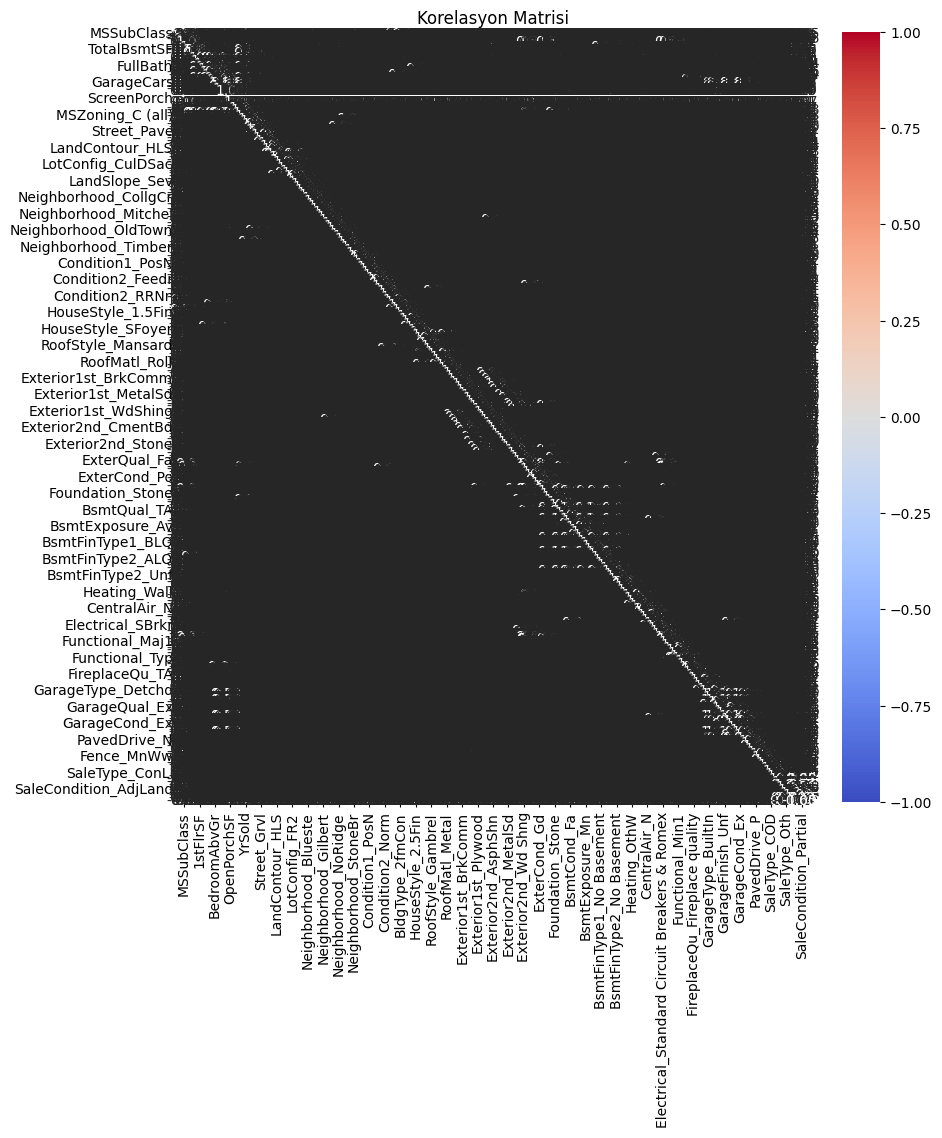

In [53]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()

In [54]:
feature_name = 'SalePrice'

#Tüm feature'lar ile ilgilenilen feature arasındaki korelasyonu hesapla
correlation_values = data.corr()[feature_name]

#Belirli bir eşik değeri (örneğin 0.05) üzerinde korelasyona sahip feature'ları seç
threshold = 0.09
selected_features = correlation_values[abs(correlation_values) > threshold].index.tolist()

#İlgilenilen feature'ı seçtiğimiz feature'lar arasından çıkar (çünkü kendi kendisiyle korelasyon 1 olacaktır)
selected_features.remove(feature_name)

#Seçilen feature'ları ve ilgilenilen feature ile olan korelasyon değerlerini göster
selected_feature_correlation = correlation_values[abs(correlation_values) > threshold].drop(feature_name)
print(f"İlgilendiğiniz feature ile {threshold} eşik değeri üzerinde korelasyona sahip feature'lar:")

for feature in selected_features:
    print(f"{feature}: {selected_feature_correlation[feature]}")

İlgilendiğiniz feature ile 0.09 eşik değeri üzerinde korelasyona sahip feature'lar:
LotArea: 0.4322159840742968
YearRemodAdd: 0.5071009671113866
BsmtUnfSF: 0.20327834056385163
TotalBsmtSF: 0.6369989084588772
1stFlrSF: 0.6207429162065565
GrLivArea: 0.7081533374393175
BsmtFullBath: 0.22712223313149427
FullBath: 0.5606637627484453
HalfBath: 0.28410767559478256
BedroomAbvGr: 0.16821315430073963
KitchenAbvGr: -0.13590737084214105
TotRmsAbvGrd: 0.5360668612036839
Fireplaces: 0.46692883675152763
GarageCars: 0.6404091972583519
GarageArea: 0.6301380726479374
WoodDeckSF: 0.330377862106697
OpenPorchSF: 0.36902449764276724
PoolArea: 0.09240354949187318
MSZoning_C (all): -0.11125658290808599
MSZoning_RL: 0.24506340389709286
MSZoning_RM: -0.2880651218971258
LotShape_IR1: 0.22328392470490183
LotShape_IR2: 0.12609608820325494
LotShape_Reg: -0.2676717602887935
LandContour_Bnk: -0.10112449060458645
LandContour_HLS: 0.12001380186770814
LotConfig_CulDSac: 0.14181753652525775
Neighborhood_BrDale: -0.101302

In [55]:
pd.set_option("display.max_rows",500)

In [56]:
print(selected_features)

['LotArea', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'MSZoning_C (all)', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LotConfig_CulDSac', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_NAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Condition1_Artery', 'Condition1_Feedr', 'Condition1_Norm', 'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'HouseStyle_1.5Fin', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofMatl_CompShg', 'RoofMatl_WdShngl', 'Exterior1st_

In [57]:
data=data[['SalePrice','LotArea', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'MSZoning_C (all)', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LotConfig_CulDSac', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_NAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Condition1_Artery', 'Condition1_Feedr', 'Condition1_Norm', 'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'HouseStyle_1.5Fin', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofMatl_CompShg', 'RoofMatl_WdShngl', 'Exterior1st_AsbShng', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_AsbShng', 'Exterior2nd_CmentBd', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'ExterQual_Ex', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Fa', 'ExterCond_TA', 'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_No Basement', 'BsmtQual_TA', 'BsmtCond_Fa', 'BsmtCond_No Basement', 'BsmtCond_TA', 'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_No', 'BsmtExposure_No Basement', 'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_No Basement', 'BsmtFinType1_Rec', 'BsmtFinType2_No Basement', 'BsmtFinType2_Unf', 'Heating_GasA', 'Heating_Grav', 'HeatingQC_Ex', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_TA', 'CentralAir_N', 'CentralAir_Y', 'Electrical_FuseA', 'Electrical_FuseF', 'Electrical_SBrkr', 'KitchenQual_Ex', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Typ', 'FireplaceQu_Ex', 'FireplaceQu_Fireplace quality', 'FireplaceQu_Gd', 'FireplaceQu_TA', 'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageType_No Garage', 'GarageFinish_Fin', 'GarageFinish_No Garage', 'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Fa', 'GarageQual_No Garage', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_No Garage', 'GarageCond_TA', 'PavedDrive_N', 'PavedDrive_Y', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_No Fence', 'SaleType_New', 'SaleType_WD', 'SaleCondition_Abnorml', 'SaleCondition_Normal', 'SaleCondition_Partial']]

In [58]:
data

SalePrice  LotArea  YearRemodAdd  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0      208500.0   8450.0        2003.0      150.0        856.0     856.0   
1      181500.0   9600.0        1976.0      284.0       1262.0    1262.0   
2      223500.0  11250.0        2002.0      434.0        920.0     920.0   
3      140000.0   9550.0        1970.0      540.0        756.0     961.0   
4      250000.0  14260.0        2000.0      490.0       1145.0    1145.0   
...         ...      ...           ...        ...          ...       ...   
1455   175000.0   7917.0        2000.0      953.0        953.0     953.0   
1456   210000.0  13175.0        1988.0      589.0       1542.0    2073.0   
1457   266500.0   9042.0        2006.0      877.0       1152.0    1188.0   
1458   142125.0   9717.0        1996.0        0.0       1078.0    1078.0   
1459   147500.0   9937.0        1965.0      136.0       1256.0    1256.0   

      GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0        1710.0           1.0       2.0       1.0           3.0           1.0   
1        1262.0           0.0       2.0       0.0           3.0           1.0   
2        1786.0           1.0       2.0       1.0           3.0           1.0   
3        1717.0           1.0       1.0       0.0           3.0           1.0   
4        2198.0           1.0       2.0       1.0           4.0           1.0   
...         ...           ...       ...       ...           ...           ...   
1455     1647.0           0.0       2.0       1.0           3.0           1.0   
1456     2073.0           1.0       2.0       0.0           3.0           1.0   
1457     2340.0           0.0       2.0       0.0           4.0           1.0   
1458     1078.0           1.0       1.0       0.0           2.0           1.0   
1459     1256.0           1.0       1.0       1.0           3.0           1.0   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0              8.0         0.0         2.0       548.0         0.0   
1              6.0         1.0         2.0       460.0       298.0   
2              6.0         1.0         2.0       608.0         0.0   
3              7.0         1.0         3.0       642.0         0.0   
4              9.0         1.0         3.0       836.0       192.0   
...            ...         ...         ...         ...         ...   
1455           7.0         1.0         2.0       460.0         0.0   
1456           7.0         2.0         2.0       500.0       349.0   
1457           9.0         2.0         1.0       252.0         0.0   
1458           5.0         0.0         1.0       240.0       366.0   
1459           6.0         0.0         1.0       276.0       420.0   

      OpenPorchSF  PoolArea  MSZoning_C (all)  MSZoning_RL  MSZoning_RM  \
0            61.0       0.0               0.0          1.0          0.0   
1             0.0       0.0               0.0          1.0          0.0   
2            42.0       0.0               0.0          1.0          0.0   
3            35.0       0.0               0.0          1.0          0.0   
4            84.0       0.0               0.0          1.0          0.0   
...           ...       ...               ...          ...          ...   
1455         40.0       0.0               0.0          1.0          0.0   
1456          0.0       0.0               0.0          1.0          0.0   
1457         60.0       0.0               0.0          1.0          0.0   
1458          0.0       0.0               0.0          1.0          0.0   
1459         68.0       0.0               0.0          1.0          0.0   

      LotShape_IR1  LotShape_IR2  LotShape_Reg  LandContour_Bnk  \
0              0.0           0.0           1.0              0.0   
1              0.0           0.0           1.0              0.0   
2              1.0           0.0           0.0              0.0   
3              1.0           0.0           0.0              0.0   
4              1.0           0.0           

In [59]:
# Bağımsız değişkenler ve hedef değişken arasında ayrım yapın
x = data.drop(columns=['SalePrice'])
y = data['SalePrice'].values
x = x.values


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

# Verileri eğitim ve test kümelerine ayırın
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=42)


In [61]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [62]:
## Actuelvalue vs predicted value hesabı yapabilirsin (Gerçek değer ve Tahmin değerinin karşılaştırılması).

# Test verileri üzerinde tahmin yapma
y_pred = model.predict(x_test)

# Gerçek değerler ile tahmin edilen değerleri karşılaştırma
comparison = np.concatenate((y_test.reshape(-1, 1), y_pred.reshape(-1, 1)), axis=1)
print("Aktuel Value vs Predicted Value:")
print(comparison)


Aktuel Value vs Predicted Value:
[[154500.    139380.66 ]
 [325000.    365147.9  ]
 [115000.    100641.59 ]
 [159000.    175467.97 ]
 [315500.    347320.47 ]
 [ 75500.     69766.78 ]
 [311500.    225452.6  ]
 [146000.    143600.28 ]
 [ 84500.     61641.938]
 [135500.    127004.97 ]
 [145000.    139048.6  ]
 [130000.    108013.125]
 [ 81000.    108827.25 ]
 [214000.    226082.1  ]
 [181000.    174861.6  ]
 [134500.    135845.6  ]
 [183500.    190295.97 ]
 [135000.    139149.16 ]
 [118400.    103054.91 ]
 [226000.    212848.34 ]
 [155000.    186135.22 ]
 [210000.    198879.78 ]
 [173500.    182668.4  ]
 [129000.    108132.59 ]
 [192000.    198250.47 ]
 [153900.    156913.28 ]
 [181134.    193086.4  ]
 [141000.    124848.34 ]
 [181000.    178015.66 ]
 [208900.    212705.53 ]
 [127000.    123160.84 ]
 [284000.    273858.16 ]
 [200500.    263861.97 ]
 [135750.    108982.78 ]
 [255000.    242181.6  ]
 [140000.    128780.53 ]
 [138000.    145124.72 ]
 [219500.    204281.28 ]
 [310000.    3212

In [63]:
# R-kare değerini hesaplayalım , r^2,adjustedr^2 1' e yakın olur 
r2 = model.score(x, y)

# R-kare değerini hesaplayalım
n = len(y)
k = x.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

# Sonuçları ekrana yazdıralım
print("R^2 Score:", r2)
print("Adjusted R^2 Score:", adjusted_r2)

R^2 Score: 0.8837992435769417
Adjusted R^2 Score: 0.8716601789392566


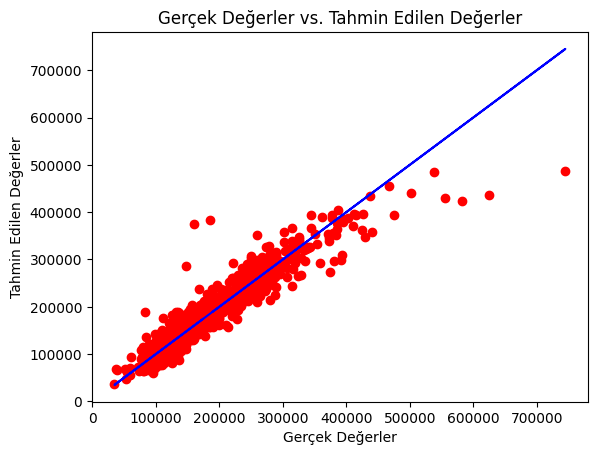

In [64]:
# Scatter plot çizimi
plt.scatter(y_train, model.predict(x_train), color='red')
plt.plot(y_train, y_train, color='blue')  # Referans çizgi olarak y = x çizgisini çiziyoruz
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek Değerler vs. Tahmin Edilen Değerler')
plt.show()

In [65]:
print(data.columns.tolist())

['SalePrice', 'LotArea', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'MSZoning_C (all)', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LotConfig_CulDSac', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_NAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Condition1_Artery', 'Condition1_Feedr', 'Condition1_Norm', 'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'HouseStyle_1.5Fin', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofMatl_CompShg', 'RoofMatl_WdShngl', 

In [66]:
data.shape

(1460, 139)